In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
path = "/content/vgsales - vgsales.csv"
df = pd.read_csv(path)
display(df)

# Define the number of clusters
n = 3

#1. Data Exploration

1. Created visualization to show which columns contain 'N/A' and 'Unknown' values. This is important because we need to make sure the columns we are going to train our model with only contain numeric values.

2. We wanted to know how many rows contained N/A values to decide if we could afford to drop them all, or if we needed to handle them a different way.
  - After seeing how few there were, we decided we can afford to drop them. 

3. We checked the types for each column to make sure that the numeric values are actually numeric and not strings or objects.
  - We noticed that the Years columns was floats, when it makes more sense for them to be ints, so we will change this.

4. We wanted to check how many data points we were dealing with in total, and in just our x-columns.

Number of N/A values =  307

 Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object 

Number of total rows:  16598
Number of total points:  182578 

Number of rows in each x column:  16598 16598 16598 16598
Number of points in training data:  66392 



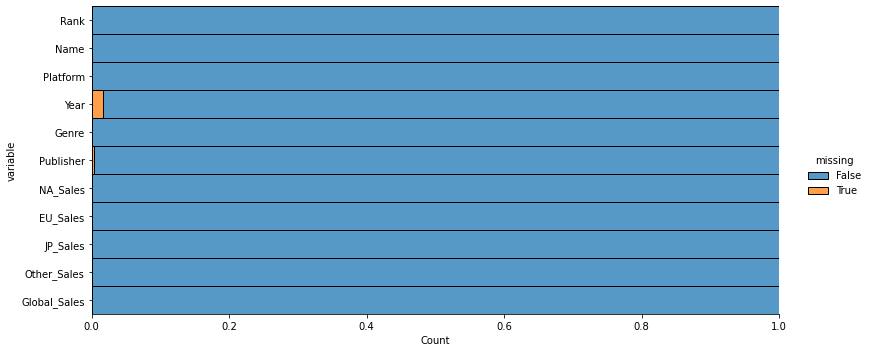

In [ ]:
#1
df['Publisher'] = df['Publisher'].replace('Unknown', 'N/A')
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)

#2
number_of_na = len(df[df.isna().any(axis=1)]) 
print("Number of N/A values = ", number_of_na)  #307

#3
print("\n", df.dtypes, "\n")

#4
#in total:
print("Number of total rows: ", len(df))
print("Number of total points: ", len(df) * len(df.columns), "\n")
#just x-columns:
d = len(df["NA_Sales"])
c = len(df["EU_Sales"])
b = len(df["JP_Sales"])
a = len(df["Other_Sales"])
print("Number of rows in each x column: ", a,b,c,d)
print("Number of points in training data: ", a+b+c+d, "\n")

#2. Prep Data

In [ ]:
df = df.dropna()
df = shuffle(df)
df['Year'] = df['Year'].astype(int)

In [ ]:
x_values = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].to_numpy()
y_values = df['Global_Sales'].to_numpy()

#3. Train Data

**Evaluation Metric: Silhouette Score**
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

###K-means

Cluster Labels:
- High Sales = Orange (1)
- Medium Sales = Green (2)
- Low Sales = Blue (0)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette Score:  0.8443747580253198 



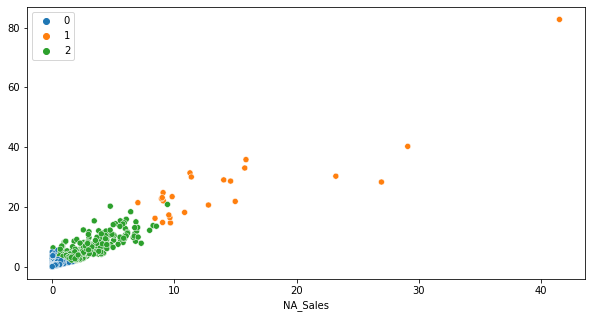

In [ ]:
from sklearn.cluster import KMeans

h = KMeans(n_clusters=n, random_state=1)

h.fit(x_values)
pred = h.predict(x_values)
labels = h.labels_

plot = plt.gcf()
plot.set_size_inches(10, 5)
sns.scatterplot(df['NA_Sales'], y_values, hue=pred, palette="tab10",legend=True)

print("Silhouette Score: ", metrics.silhouette_score(x_values, labels, metric='euclidean'), "\n")

###Agglomerative Clustering

Cluster Labels:
- High Sales = Green (2)
- Medium Sales = Blue (0)
- Low Sales = Orange (1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette Score:  0.8160313406364886 



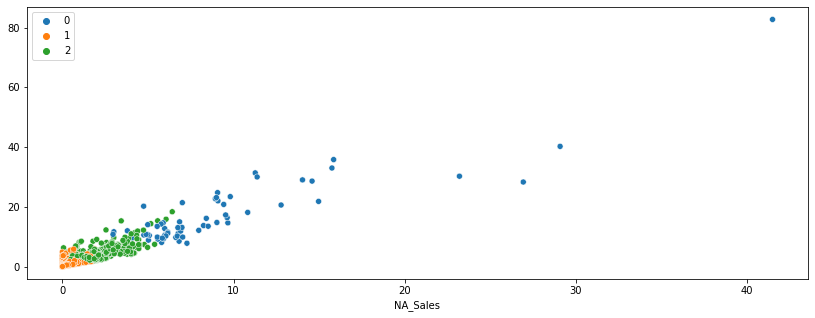

In [ ]:
from sklearn.cluster import AgglomerativeClustering

h = AgglomerativeClustering(n_clusters=n)

pred = h.fit_predict(x_values)
labels = h.labels_

plot = plt.gcf()
plot.set_size_inches(14, 5)
sns.scatterplot(df['NA_Sales'], y_values, hue=labels, palette="tab10",legend=True)

# Evaluate
print("Silhouette Score: ", metrics.silhouette_score(x_values, labels, metric='euclidean'), "\n")

###MeanShift Clustering


In [ ]:
from sklearn.cluster import MeanShift

h = MeanShift(bandwidth=7)

h.fit(x_values)
pred = h.predict(x_values)

Silhouette Score:  0.9566520112865612 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


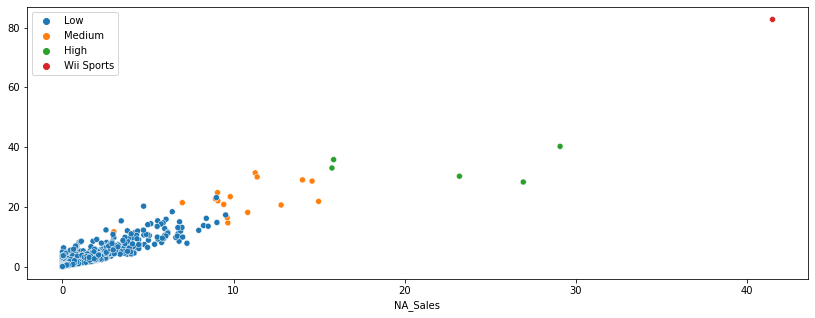

In [ ]:
# Metrics
labels = h.labels_
print("Silhouette Score: ", metrics.silhouette_score(x_values, labels, metric='euclidean'), "\n")

def map_label(lab):
  if lab == 0: return "Low"
  if lab == 1: return "High"
  if lab == 2: return "Wii Sports"
  if lab == 3: return "Medium"
  return "Unknown"

def map_labels(source):
  res = ["Unknown"]*source.size
  for i in range(0, source.size):
    res[i] = map_label(source[i])
  return res

pred = map_labels(pred)

plot = plt.gcf()
plot.set_size_inches(14, 5)
sns.scatterplot(df['NA_Sales'], y_values, hue=pred, palette="tab10",legend=True)

#4. Cluster Analysis
MeanShift Clustering provided the best evaluation metric meaning it created the best clusters. We are going to use this algorithm to explore trends in the data in relation to their respective clusters. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1224x360 with 0 Axes>

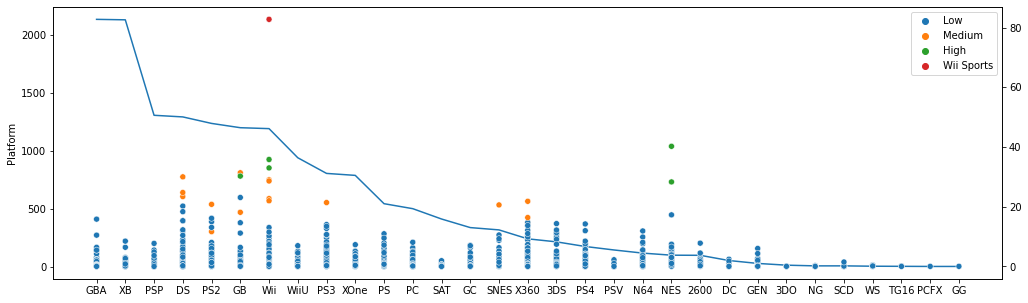

In [ ]:
plot = plt.gcf()
plot.set_size_inches(17, 5)
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(17,5))

sns.lineplot(df['Platform'].value_counts().index, df['Platform'].value_counts(), ax=ax1)
ax2 = ax1.twinx()
sns.scatterplot(df['Platform'], y_values, hue=pred, palette="tab10",legend=True, ax=ax2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1224x360 with 0 Axes>

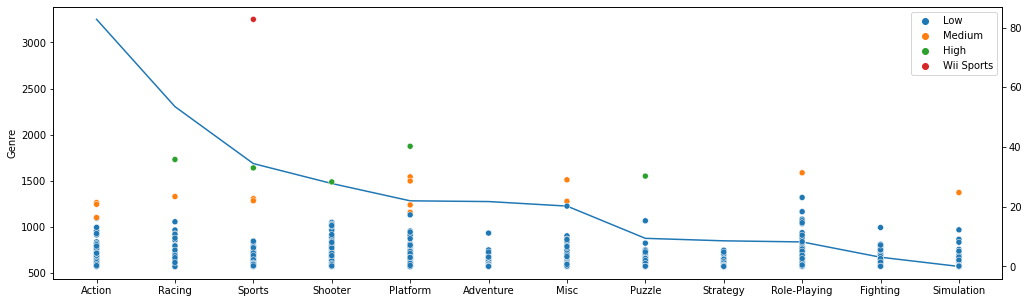

In [ ]:
plot = plt.gcf()
plot.set_size_inches(17, 5)
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(17,5))

sns.lineplot(df['Genre'].value_counts().index, df['Genre'].value_counts(), ax=ax1)
ax2 = ax1.twinx()
sns.scatterplot(df['Genre'], y_values, hue=pred, palette="tab10",legend=True, ax=ax2)

# plot = plt.gcf()
# plot.set_size_inches(14, 5)
# sns.scatterplot(df['Genre'], y_values, hue=pred, palette="tab10",legend=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1224x360 with 0 Axes>

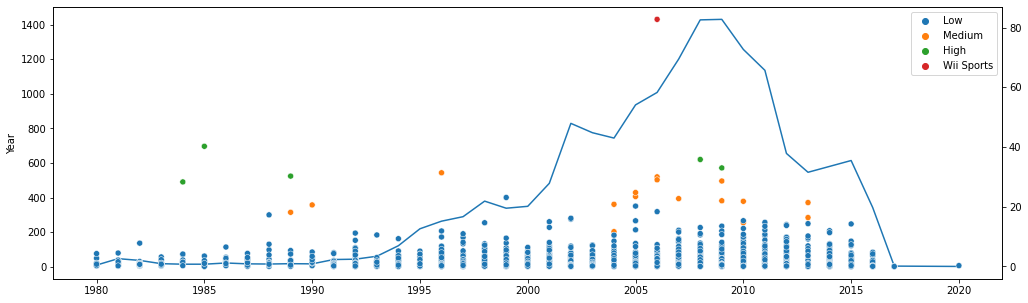

In [ ]:
plot = plt.gcf()
plot.set_size_inches(17, 5)
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(17,5))

sns.lineplot(df['Year'].value_counts().index, df['Year'].value_counts(), ax=ax1)
ax2 = ax1.twinx()
sns.scatterplot(df['Year'], y_values, hue=pred, palette="tab10",legend=True, ax=ax2)
# plot = plt.gcf()
# plot.set_size_inches(17, 5)
# scatter = sns.scatterplot(df['Year'], y_values, hue=pred, palette="tab10", legend=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

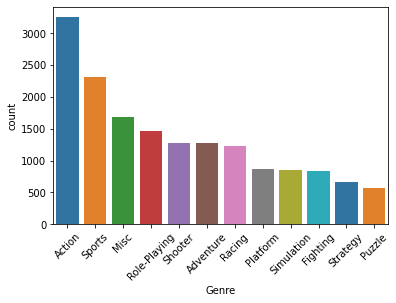

In [ ]:
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index, palette="tab10")
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

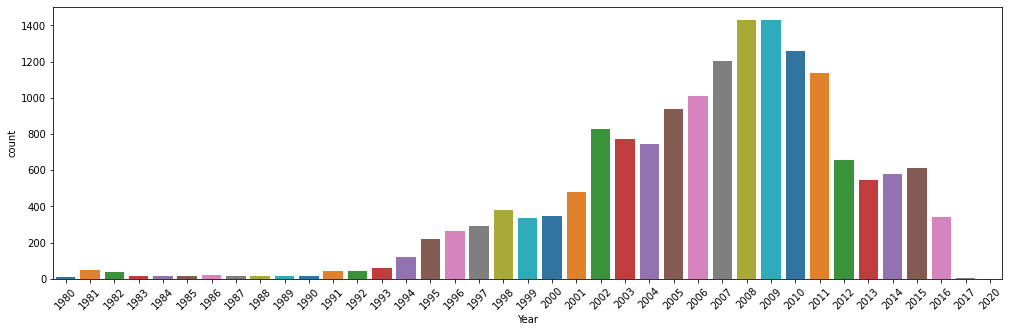

In [ ]:
plot = plt.gcf()
plot.set_size_inches(17, 5)
sns.countplot(x="Year", data=df, palette="tab10")
plt.xticks(rotation = 45)